In [123]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
import torch

from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable

from trainer import fit,train_epoch
import numpy as np
cuda = torch.cuda.is_available()

In [125]:


drop_cols = [
                 'name',
                 'group',
                 'Tc', 'ln(Tc)'
                 ]
data_set = pd.read_excel('./data/Supercon_data_features_selected.xlsx')
data_set.columns

Index(['GSenergy_pa_composition_average', 'BulkModulus_difference',
       'NUnfilled_composition_average', 'Density_min_value',
       'valence_composition_average', 'HHIr_composition_average',
       'IsAlkalineEarth_composition_average', 'Density_arithmetic_average',
       'BCCvolume_padiff_composition_average', 'HHIp_composition_average',
       'ElectronAffinity_composition_average',
       'NfUnfilled_composition_average', 'IsRareEarth_composition_average',
       'IsHexagonal_composition_average',
       'ThermalConductivity_composition_average',
       'ElectricalConductivity_composition_average',
       'IonicRadii_composition_average', 'Polarizability_min_value',
       'NValance_composition_average', 'ElasticModulus_composition_average',
       'AtomicRadii_composition_average', 'BCCmagmom_composition_average',
       'BCCfermi_composition_average', 'NfUnfilled_max_value',
       'BCCenergy_pa_composition_average', 'name', 'Tc', 'group', 'ln(Tc)'],
      dtype='object')

In [126]:
data_set.shape

(6252, 29)

In [127]:
# data_set = pd.read_csv('./data/friedman_data.csv')

drop_columns = drop_cols
# drop_columns = ['E_regression', 'E_regression_shift', 'group',
#                'Material compositions 2', 'Material compositions 1']
data_set = data_set.drop(drop_columns, axis = 1)

In [128]:
data_set

,GSenergy_pa_composition_average,BulkModulus_difference,NUnfilled_composition_average,Density_min_value,valence_composition_average,HHIr_composition_average,IsAlkalineEarth_composition_average,Density_arithmetic_average,BCCvolume_padiff_composition_average,HHIp_composition_average,...,ElectricalConductivity_composition_average,IonicRadii_composition_average,Polarizability_min_value,NValance_composition_average,ElasticModulus_composition_average,AtomicRadii_composition_average,BCCmagmom_composition_average,BCCfermi_composition_average,NfUnfilled_max_value,BCCenergy_pa_composition_average
0,-5.460136,166.9,2.920000,856.000,4.680000,3208.000000,0.080000,4491.750000,-1.386800,2724.000000,...,8.192000,0.746800,4.310000,9.480000,101.328000,1.512000,0.844265,5.291937,0,-5.285643
1,-4.160523,130.4,2.190217,1.429,2.097050,1190.993789,0.128106,4025.485800,-0.933531,1977.872671,...,15.566382,1.210171,0.802000,6.361025,35.648292,1.152069,0.000078,3.685240,0,-2.893468
2,-4.546561,152.0,3.501429,1.429,2.252857,1391.857143,0.041429,5319.485800,-0.926104,3021.857143,...,8.975857,1.239171,0.802000,5.798571,31.270000,1.147096,0.014631,4.367115,0,-3.195665
3,-8.496939,127.0,6.287500,7310.000,4.712500,7183.750000,0.000000,9243.333333,-1.736438,7171.250000,...,7.008750,0.690500,7.060000,7.737500,89.075000,1.480125,0.000000,5.884944,0,-8.482146
4,-4.237486,112.0,2.589520,1.429,2.229258,1292.576419,0.098253,5807.485800,-1.069569,2244.541485,...,10.921397,1.236245,0.802000,7.266376,28.875546,1.152675,0.000097,4.003412,0,-2.918519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,-4.020242,130.4,1.598456,1.429,2.077220,1216.602317,0.154440,5624.485800,-0.949672,1835.907336,...,13.902703,1.219459,-5.816667,7.019305,35.150579,1.168440,0.000000,3.163053,4,-2.766734
6248,-4.054813,123.0,1.869537,1.429,2.424005,1595.890411,0.163079,5520.885800,-1.503637,2117.742988,...,13.176778,1.188650,0.400000,9.065884,25.505545,1.165225,0.000000,3.923896,8,-2.783499
6249,-4.548996,112.0,3.573929,1.429,2.254286,1382.714286,0.031429,4967.485800,-0.908696,3062.000000,...,9.296071,1.238861,-5.816667,5.826071,30.889643,1.144599,0.000205,4.412494,0,-3.197352
6250,-3.936502,123.0,1.785750,1.429,2.282375,1274.437500,0.156250,5133.775571,-1.085245,1831.250000,...,13.592875,1.206036,0.802000,9.272250,30.471062,1.209046,0.000000,3.801802,3,-2.769327


### Test loader

In [129]:
# Set up data loaders
from datasets import TripletSampling, BatchPairSampling

In [130]:
data_set_shuffled = data_set.sample(frac=1).reset_index(drop=True)
data_set_shuffled.head()

,GSenergy_pa_composition_average,BulkModulus_difference,NUnfilled_composition_average,Density_min_value,valence_composition_average,HHIr_composition_average,IsAlkalineEarth_composition_average,Density_arithmetic_average,BCCvolume_padiff_composition_average,HHIp_composition_average,...,ElectricalConductivity_composition_average,IonicRadii_composition_average,Polarizability_min_value,NValance_composition_average,ElasticModulus_composition_average,AtomicRadii_composition_average,BCCmagmom_composition_average,BCCfermi_composition_average,NfUnfilled_max_value,BCCenergy_pa_composition_average
0,-7.027184,112.0,5.500000,7310.000,4.500000,5200.000000,0.000000,7940.000000,-4.027500,5550.000000,...,7.650000,0.675000,7.060,9.500000,77.000000,1.524500,0.0,6.976185,0,-6.994123
1,-3.990110,138.1,1.931298,1.429,2.419847,1603.816794,0.152672,4004.685800,-1.094504,2035.877863,...,14.465649,1.259084,0.802,7.061069,35.297710,1.193588,0.0,3.086259,0,-2.844674
2,-4.172174,130.4,2.060883,1.429,2.091324,1248.097412,0.152207,4239.571500,-1.114460,2035.768645,...,13.776256,1.201218,0.802,6.334855,33.698630,1.158113,0.0,3.165391,0,-2.905431
3,-8.586122,148.0,6.212500,5727.000,4.787500,7090.000000,0.000000,7202.333333,-1.830375,7051.250000,...,6.941250,0.652625,4.310,7.287500,90.087500,1.468125,0.0,5.842407,0,-8.555724
4,-3.917395,123.0,1.602649,1.429,2.397351,1758.278146,0.198675,4576.285800,-1.591225,1996.688742,...,10.894040,1.217219,0.400,8.913907,24.304636,1.201258,0.0,3.767946,0,-2.667793


In [131]:
# fake labels for pos/neg
labels = [1]* int(0.5 * data_set_shuffled.shape[0]) + [0]*int( 0.5 * data_set_shuffled.shape[0] ) 

In [132]:
data_set_shuffled.values

array([[ -7.02718431, 112.        ,   5.5       , ...,   6.97618467,
          0.        ,  -6.99412349],
       [ -3.99011003, 138.1       ,   1.93129771, ...,   3.08625886,
          0.        ,  -2.84467423],
       [ -4.17217352, 130.4       ,   2.0608828 , ...,   3.16539085,
          0.        ,  -2.90543056],
       ...,
       [ -5.61941375, 148.        ,   3.57068063, ...,   4.92502584,
          5.        ,  -4.9744114 ],
       [ -4.13723714, 130.4       ,   2.07713074, ...,   3.17429372,
         11.        ,  -2.88486656],
       [ -4.1473767 , 275.        ,   2.525     , ...,   7.19047362,
          0.        ,  -3.27683474]])

In [133]:
data_set_shuffled = torch.tensor(data_set_shuffled.values)

In [134]:
#dataloader = TripletSampling( dataset = data_set_shuffled , labels=labels)
datasampler = BatchPairSampling( dataset = data_set_shuffled , labels=labels)
batch_size = 10
train_loader = torch.utils.data.DataLoader(datasampler, batch_size=batch_size, shuffle=True)

In [135]:
for batch,_ in train_loader:
    print(len(batch))
    print(batch[0].shape)
    break

2
torch.Size([10, 25])


### Test model

In [136]:
from networks import EmbeddingNet, TripletNet, SiameseNet

In [137]:
input_size = data_set_shuffled.shape[1]
hidden_size = 100
embedding_size = 10
net = EmbeddingNet(input_size, hidden_size, embedding_size)
# triplet_net = TripletNet(  embedding_net = net )
siamese_net = SiameseNet(  embedding_net = net )

In [138]:
x1 = torch.rand( 1,25)
x2 = torch.rand( 1,25)
# x3 = torch.rand( 1,24)
emb1, emb2 = siamese_net(x1,x2)

In [139]:
result = siamese_net(*batch)
print(len(result), len(result[0]))

2 10


In [140]:
a = torch.rand(3,5)
b = torch.rand(3,5)
sim_a = torch.cdist(a,a, p = 2).flatten()
non_zero = torch.nonzero( sim_a )
torch.max( sim_a[non_zero] )

tensor(1.2623)

### Test loss

In [141]:
from losses import TripletLoss, HardNegativesBatchLoss

def euclidean(a,b):
    if len(a.shape) == 1:
        a = torch.unsqueeze(a,0)
        b = torch.unsqueeze(b,0)
#     print(a)
#     print(b)
    return (a - b).pow(2).sum(1)

margin = 1
distance = euclidean
# loss_fn = TripletLoss( margin = margin, distance = distance)
loss_fn = HardNegativesBatchLoss( margin = margin, distance = distance)

In [142]:
loss_fn(*result)

tensor(1.5916, grad_fn=<ReluBackward0>)

### Test training

In [166]:
loss_fn = HardNegativesBatchLoss( margin = margin, distance = distance)
lr = 1e-3

hidden_size = 100
embedding_size = 20
net = EmbeddingNet(input_size, hidden_size, embedding_size)
# triplet_net = TripletNet(  embedding_net = net )
siamese_net = SiameseNet(  embedding_net = net )


model = siamese_net
model = model.float() 
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 200

datasampler = BatchPairSampling( dataset = data_set_shuffled , labels=labels)
batch_size = 20
train_loader = torch.utils.data.DataLoader(datasampler, batch_size=batch_size, shuffle=True)

interval = 20

In [167]:
%%time
fit(train_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, interval)


Train: [0/6252 (0%)]	Loss: 1.349043
Train: [400/6252 (6%)]	Loss: 1.039437
Train: [800/6252 (13%)]	Loss: 0.853305
Train: [1200/6252 (19%)]	Loss: 0.496333
Train: [1600/6252 (26%)]	Loss: 0.429587
Train: [2000/6252 (32%)]	Loss: 1.023495
Train: [2400/6252 (38%)]	Loss: 0.710150
Train: [2800/6252 (45%)]	Loss: 0.662580
Train: [3200/6252 (51%)]	Loss: 0.230442
Train: [3600/6252 (58%)]	Loss: 0.974719
Train: [4000/6252 (64%)]	Loss: 0.386161
Train: [4400/6252 (70%)]	Loss: 0.649327
Train: [4800/6252 (77%)]	Loss: 0.569785
Train: [5200/6252 (83%)]	Loss: 0.407379
Train: [5600/6252 (89%)]	Loss: 0.642104
Train: [6000/6252 (96%)]	Loss: 1.259609
Epoch: 1/200. Train set: Average loss: 0.6837
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.483704
Train: [800/6252 (13%)]	Loss: 1.011144
Train: [1200/6252 (19%)]	Loss: 0.651239
Train: [1600/6252 (26%)]	Loss: 0.368848
Train: [2000/6252 (32%)]	Loss: 0.577126
Train: [2400/6252 (38%)]	Loss: 0.820799
Train: [2800/6252 (45%)]	Loss: 0.393427
Train: [

Train: [1600/6252 (26%)]	Loss: 0.444641
Train: [2000/6252 (32%)]	Loss: 0.438816
Train: [2400/6252 (38%)]	Loss: 0.658992
Train: [2800/6252 (45%)]	Loss: 0.509085
Train: [3200/6252 (51%)]	Loss: 0.549012
Train: [3600/6252 (58%)]	Loss: 0.347731
Train: [4000/6252 (64%)]	Loss: 0.447735
Train: [4400/6252 (70%)]	Loss: 0.500488
Train: [4800/6252 (77%)]	Loss: 0.412571
Train: [5200/6252 (83%)]	Loss: 0.540401
Train: [5600/6252 (89%)]	Loss: 0.620485
Train: [6000/6252 (96%)]	Loss: 0.604856
Epoch: 13/200. Train set: Average loss: 0.5041
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.475382
Train: [800/6252 (13%)]	Loss: 0.698391
Train: [1200/6252 (19%)]	Loss: 0.414429
Train: [1600/6252 (26%)]	Loss: 0.389115
Train: [2000/6252 (32%)]	Loss: 0.249396
Train: [2400/6252 (38%)]	Loss: 0.435755
Train: [2800/6252 (45%)]	Loss: 0.500080
Train: [3200/6252 (51%)]	Loss: 0.516523
Train: [3600/6252 (58%)]	Loss: 0.504243
Train: [4000/6252 (64%)]	Loss: 0.737534
Train: [4400/6252 (70%)]	Loss: 0.644375


Train: [2400/6252 (38%)]	Loss: 0.639088
Train: [2800/6252 (45%)]	Loss: 0.563971
Train: [3200/6252 (51%)]	Loss: 0.325290
Train: [3600/6252 (58%)]	Loss: 0.573704
Train: [4000/6252 (64%)]	Loss: 0.592844
Train: [4400/6252 (70%)]	Loss: 0.680810
Train: [4800/6252 (77%)]	Loss: 0.548997
Train: [5200/6252 (83%)]	Loss: 0.286764
Train: [5600/6252 (89%)]	Loss: 0.435463
Train: [6000/6252 (96%)]	Loss: 0.507944
Epoch: 25/200. Train set: Average loss: 0.4899
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.384645
Train: [800/6252 (13%)]	Loss: 0.511435
Train: [1200/6252 (19%)]	Loss: 0.444272
Train: [1600/6252 (26%)]	Loss: 0.478886
Train: [2000/6252 (32%)]	Loss: 0.561205
Train: [2400/6252 (38%)]	Loss: 0.700151
Train: [2800/6252 (45%)]	Loss: 0.600936
Train: [3200/6252 (51%)]	Loss: 0.400192
Train: [3600/6252 (58%)]	Loss: 0.552779
Train: [4000/6252 (64%)]	Loss: 0.407003
Train: [4400/6252 (70%)]	Loss: 0.453003
Train: [4800/6252 (77%)]	Loss: 0.529972
Train: [5200/6252 (83%)]	Loss: 0.525518


Train: [3600/6252 (58%)]	Loss: 0.299438
Train: [4000/6252 (64%)]	Loss: 0.452754
Train: [4400/6252 (70%)]	Loss: 0.205312
Train: [4800/6252 (77%)]	Loss: 0.379205
Train: [5200/6252 (83%)]	Loss: 0.584254
Train: [5600/6252 (89%)]	Loss: 0.393715
Train: [6000/6252 (96%)]	Loss: 0.754017
Epoch: 37/200. Train set: Average loss: 0.4987
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.400023
Train: [800/6252 (13%)]	Loss: 0.529344
Train: [1200/6252 (19%)]	Loss: 0.768471
Train: [1600/6252 (26%)]	Loss: 0.580812
Train: [2000/6252 (32%)]	Loss: 0.555534
Train: [2400/6252 (38%)]	Loss: 0.451215
Train: [2800/6252 (45%)]	Loss: 0.428727
Train: [3200/6252 (51%)]	Loss: 0.600802
Train: [3600/6252 (58%)]	Loss: 0.574952
Train: [4000/6252 (64%)]	Loss: 0.613233
Train: [4400/6252 (70%)]	Loss: 0.515968
Train: [4800/6252 (77%)]	Loss: 0.683035
Train: [5200/6252 (83%)]	Loss: 0.486372
Train: [5600/6252 (89%)]	Loss: 0.456754
Train: [6000/6252 (96%)]	Loss: 0.579926
Epoch: 38/200. Train set: Average loss: 

Train: [4000/6252 (64%)]	Loss: 0.502581
Train: [4400/6252 (70%)]	Loss: 0.508517
Train: [4800/6252 (77%)]	Loss: 0.562081
Train: [5200/6252 (83%)]	Loss: 0.445468
Train: [5600/6252 (89%)]	Loss: 0.378425
Train: [6000/6252 (96%)]	Loss: 0.704729
Epoch: 49/200. Train set: Average loss: 0.5056
Train: [0/6252 (0%)]	Loss: 0.941849
Train: [400/6252 (6%)]	Loss: 0.580579
Train: [800/6252 (13%)]	Loss: 0.535346
Train: [1200/6252 (19%)]	Loss: 0.384096
Train: [1600/6252 (26%)]	Loss: 0.590653
Train: [2000/6252 (32%)]	Loss: 0.452908
Train: [2400/6252 (38%)]	Loss: 0.603571
Train: [2800/6252 (45%)]	Loss: 0.563423
Train: [3200/6252 (51%)]	Loss: 0.485242
Train: [3600/6252 (58%)]	Loss: 0.544461
Train: [4000/6252 (64%)]	Loss: 0.613620
Train: [4400/6252 (70%)]	Loss: 0.508620
Train: [4800/6252 (77%)]	Loss: 0.667783
Train: [5200/6252 (83%)]	Loss: 0.651287
Train: [5600/6252 (89%)]	Loss: 0.497493
Train: [6000/6252 (96%)]	Loss: 0.455558
Epoch: 50/200. Train set: Average loss: 0.5325
Train: [0/6252 (0%)]	Loss: 0.0000

Train: [5200/6252 (83%)]	Loss: 0.530579
Train: [5600/6252 (89%)]	Loss: 0.677194
Train: [6000/6252 (96%)]	Loss: 0.427908
Epoch: 61/200. Train set: Average loss: 0.5219
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.549445
Train: [800/6252 (13%)]	Loss: 0.537772
Train: [1200/6252 (19%)]	Loss: 0.669918
Train: [1600/6252 (26%)]	Loss: 0.440978
Train: [2000/6252 (32%)]	Loss: 0.536575
Train: [2400/6252 (38%)]	Loss: 0.775349
Train: [2800/6252 (45%)]	Loss: 0.438991
Train: [3200/6252 (51%)]	Loss: 0.620958
Train: [3600/6252 (58%)]	Loss: 0.468446
Train: [4000/6252 (64%)]	Loss: 0.495308
Train: [4400/6252 (70%)]	Loss: 0.477761
Train: [4800/6252 (77%)]	Loss: 0.602408
Train: [5200/6252 (83%)]	Loss: 0.481942
Train: [5600/6252 (89%)]	Loss: 0.434350
Train: [6000/6252 (96%)]	Loss: 0.377689
Epoch: 62/200. Train set: Average loss: 0.5186
Train: [0/6252 (0%)]	Loss: 0.981812
Train: [400/6252 (6%)]	Loss: 0.508029
Train: [800/6252 (13%)]	Loss: 0.350608
Train: [1200/6252 (19%)]	Loss: 0.577205


Train: [5600/6252 (89%)]	Loss: 0.583728
Train: [6000/6252 (96%)]	Loss: 0.347368
Epoch: 73/200. Train set: Average loss: 0.5078
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.346325
Train: [800/6252 (13%)]	Loss: 0.550336
Train: [1200/6252 (19%)]	Loss: 0.636560
Train: [1600/6252 (26%)]	Loss: 0.538517
Train: [2000/6252 (32%)]	Loss: 0.433374
Train: [2400/6252 (38%)]	Loss: 0.586798
Train: [2800/6252 (45%)]	Loss: 0.705843
Train: [3200/6252 (51%)]	Loss: 0.494569
Train: [3600/6252 (58%)]	Loss: 0.503067
Train: [4000/6252 (64%)]	Loss: 0.687471
Train: [4400/6252 (70%)]	Loss: 0.580726
Train: [4800/6252 (77%)]	Loss: 0.513477
Train: [5200/6252 (83%)]	Loss: 0.547668
Train: [5600/6252 (89%)]	Loss: 0.586000
Train: [6000/6252 (96%)]	Loss: 0.508030
Epoch: 74/200. Train set: Average loss: 0.5407
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.644246
Train: [800/6252 (13%)]	Loss: 0.648436
Train: [1200/6252 (19%)]	Loss: 0.355862
Train: [1600/6252 (26%)]	Loss: 0.448676


Train: [400/6252 (6%)]	Loss: 0.477695
Train: [800/6252 (13%)]	Loss: 0.540185
Train: [1200/6252 (19%)]	Loss: 0.448852
Train: [1600/6252 (26%)]	Loss: 0.379137
Train: [2000/6252 (32%)]	Loss: 0.549184
Train: [2400/6252 (38%)]	Loss: 0.478716
Train: [2800/6252 (45%)]	Loss: 0.590693
Train: [3200/6252 (51%)]	Loss: 0.374679
Train: [3600/6252 (58%)]	Loss: 0.493890
Train: [4000/6252 (64%)]	Loss: 0.649374
Train: [4400/6252 (70%)]	Loss: 0.413808
Train: [4800/6252 (77%)]	Loss: 0.514544
Train: [5200/6252 (83%)]	Loss: 0.426702
Train: [5600/6252 (89%)]	Loss: 0.498663
Train: [6000/6252 (96%)]	Loss: 0.696186
Epoch: 86/200. Train set: Average loss: 0.4975
Train: [0/6252 (0%)]	Loss: 0.934036
Train: [400/6252 (6%)]	Loss: 0.518299
Train: [800/6252 (13%)]	Loss: 0.492269
Train: [1200/6252 (19%)]	Loss: 0.620575
Train: [1600/6252 (26%)]	Loss: 0.312808
Train: [2000/6252 (32%)]	Loss: 0.406143
Train: [2400/6252 (38%)]	Loss: 0.441484
Train: [2800/6252 (45%)]	Loss: 0.488194
Train: [3200/6252 (51%)]	Loss: 0.402283
Tra

Train: [1600/6252 (26%)]	Loss: 0.586282
Train: [2000/6252 (32%)]	Loss: 0.369702
Train: [2400/6252 (38%)]	Loss: 0.465703
Train: [2800/6252 (45%)]	Loss: 0.622297
Train: [3200/6252 (51%)]	Loss: 0.501200
Train: [3600/6252 (58%)]	Loss: 0.533493
Train: [4000/6252 (64%)]	Loss: 0.435181
Train: [4400/6252 (70%)]	Loss: 0.497336
Train: [4800/6252 (77%)]	Loss: 0.584876
Train: [5200/6252 (83%)]	Loss: 0.486797
Train: [5600/6252 (89%)]	Loss: 0.526058
Train: [6000/6252 (96%)]	Loss: 0.489552
Epoch: 98/200. Train set: Average loss: 0.5102
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.341108
Train: [800/6252 (13%)]	Loss: 0.646307
Train: [1200/6252 (19%)]	Loss: 0.543026
Train: [1600/6252 (26%)]	Loss: 0.629020
Train: [2000/6252 (32%)]	Loss: 0.452011
Train: [2400/6252 (38%)]	Loss: 0.538669
Train: [2800/6252 (45%)]	Loss: 0.680292
Train: [3200/6252 (51%)]	Loss: 0.761430
Train: [3600/6252 (58%)]	Loss: 0.410426
Train: [4000/6252 (64%)]	Loss: 0.713393
Train: [4400/6252 (70%)]	Loss: 0.469368


Train: [2000/6252 (32%)]	Loss: 0.614717
Train: [2400/6252 (38%)]	Loss: 0.582672
Train: [2800/6252 (45%)]	Loss: 0.588403
Train: [3200/6252 (51%)]	Loss: 0.574676
Train: [3600/6252 (58%)]	Loss: 0.546445
Train: [4000/6252 (64%)]	Loss: 0.600630
Train: [4400/6252 (70%)]	Loss: 0.419308
Train: [4800/6252 (77%)]	Loss: 0.402717
Train: [5200/6252 (83%)]	Loss: 0.595875
Train: [5600/6252 (89%)]	Loss: 0.493659
Train: [6000/6252 (96%)]	Loss: 0.407527
Epoch: 110/200. Train set: Average loss: 0.5243
Train: [0/6252 (0%)]	Loss: 0.994995
Train: [400/6252 (6%)]	Loss: 0.538591
Train: [800/6252 (13%)]	Loss: 0.414364
Train: [1200/6252 (19%)]	Loss: 0.518990
Train: [1600/6252 (26%)]	Loss: 0.545876
Train: [2000/6252 (32%)]	Loss: 0.403378
Train: [2400/6252 (38%)]	Loss: 0.756781
Train: [2800/6252 (45%)]	Loss: 0.398618
Train: [3200/6252 (51%)]	Loss: 0.679449
Train: [3600/6252 (58%)]	Loss: 0.544195
Train: [4000/6252 (64%)]	Loss: 0.532169
Train: [4400/6252 (70%)]	Loss: 0.583114
Train: [4800/6252 (77%)]	Loss: 0.544724

Train: [2400/6252 (38%)]	Loss: 0.521462
Train: [2800/6252 (45%)]	Loss: 0.452217
Train: [3200/6252 (51%)]	Loss: 0.639419
Train: [3600/6252 (58%)]	Loss: 0.496522
Train: [4000/6252 (64%)]	Loss: 0.395473
Train: [4400/6252 (70%)]	Loss: 0.525526
Train: [4800/6252 (77%)]	Loss: 0.538773
Train: [5200/6252 (83%)]	Loss: 0.514092
Train: [5600/6252 (89%)]	Loss: 0.595681
Train: [6000/6252 (96%)]	Loss: 0.390040
Epoch: 122/200. Train set: Average loss: 0.4851
Train: [0/6252 (0%)]	Loss: 1.009186
Train: [400/6252 (6%)]	Loss: 0.500412
Train: [800/6252 (13%)]	Loss: 0.576077
Train: [1200/6252 (19%)]	Loss: 0.612286
Train: [1600/6252 (26%)]	Loss: 0.590814
Train: [2000/6252 (32%)]	Loss: 0.415020
Train: [2400/6252 (38%)]	Loss: 0.394866
Train: [2800/6252 (45%)]	Loss: 0.299254
Train: [3200/6252 (51%)]	Loss: 0.681430
Train: [3600/6252 (58%)]	Loss: 0.412000
Train: [4000/6252 (64%)]	Loss: 0.389476
Train: [4400/6252 (70%)]	Loss: 0.285662
Train: [4800/6252 (77%)]	Loss: 0.621420
Train: [5200/6252 (83%)]	Loss: 0.575303

Train: [3600/6252 (58%)]	Loss: 0.498940
Train: [4000/6252 (64%)]	Loss: 0.491302
Train: [4400/6252 (70%)]	Loss: 0.620595
Train: [4800/6252 (77%)]	Loss: 0.453059
Train: [5200/6252 (83%)]	Loss: 0.450249
Train: [5600/6252 (89%)]	Loss: 0.567685
Train: [6000/6252 (96%)]	Loss: 0.716999
Epoch: 134/200. Train set: Average loss: 0.5057
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.444343
Train: [800/6252 (13%)]	Loss: 0.511721
Train: [1200/6252 (19%)]	Loss: 0.350340
Train: [1600/6252 (26%)]	Loss: 0.670311
Train: [2000/6252 (32%)]	Loss: 0.545548
Train: [2400/6252 (38%)]	Loss: 0.457845
Train: [2800/6252 (45%)]	Loss: 0.389043
Train: [3200/6252 (51%)]	Loss: 0.600875
Train: [3600/6252 (58%)]	Loss: 0.590706
Train: [4000/6252 (64%)]	Loss: 0.522470
Train: [4400/6252 (70%)]	Loss: 0.575536
Train: [4800/6252 (77%)]	Loss: 0.364691
Train: [5200/6252 (83%)]	Loss: 0.606168
Train: [5600/6252 (89%)]	Loss: 0.434996
Train: [6000/6252 (96%)]	Loss: 0.508928
Epoch: 135/200. Train set: Average loss

Train: [4800/6252 (77%)]	Loss: 0.511533
Train: [5200/6252 (83%)]	Loss: 0.422143
Train: [5600/6252 (89%)]	Loss: 0.355756
Train: [6000/6252 (96%)]	Loss: 0.450330
Epoch: 146/200. Train set: Average loss: 0.5138
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.449677
Train: [800/6252 (13%)]	Loss: 0.650202
Train: [1200/6252 (19%)]	Loss: 0.589287
Train: [1600/6252 (26%)]	Loss: 0.457140
Train: [2000/6252 (32%)]	Loss: 0.688152
Train: [2400/6252 (38%)]	Loss: 0.486300
Train: [2800/6252 (45%)]	Loss: 0.408160
Train: [3200/6252 (51%)]	Loss: 0.355968
Train: [3600/6252 (58%)]	Loss: 0.536512
Train: [4000/6252 (64%)]	Loss: 0.501761
Train: [4400/6252 (70%)]	Loss: 0.536367
Train: [4800/6252 (77%)]	Loss: 0.598667
Train: [5200/6252 (83%)]	Loss: 0.662188
Train: [5600/6252 (89%)]	Loss: 0.565395
Train: [6000/6252 (96%)]	Loss: 0.498054
Epoch: 147/200. Train set: Average loss: 0.5290
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.508643
Train: [800/6252 (13%)]	Loss: 0.39278

Train: [5200/6252 (83%)]	Loss: 0.340969
Train: [5600/6252 (89%)]	Loss: 0.583736
Train: [6000/6252 (96%)]	Loss: 0.588237
Epoch: 158/200. Train set: Average loss: 0.5053
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.441759
Train: [800/6252 (13%)]	Loss: 0.565414
Train: [1200/6252 (19%)]	Loss: 0.445712
Train: [1600/6252 (26%)]	Loss: 0.456197
Train: [2000/6252 (32%)]	Loss: 0.515689
Train: [2400/6252 (38%)]	Loss: 0.496468
Train: [2800/6252 (45%)]	Loss: 0.644763
Train: [3200/6252 (51%)]	Loss: 0.359653
Train: [3600/6252 (58%)]	Loss: 0.484916
Train: [4000/6252 (64%)]	Loss: 0.583652
Train: [4400/6252 (70%)]	Loss: 0.659231
Train: [4800/6252 (77%)]	Loss: 0.291982
Train: [5200/6252 (83%)]	Loss: 0.460770
Train: [5600/6252 (89%)]	Loss: 0.552823
Train: [6000/6252 (96%)]	Loss: 0.519390
Epoch: 159/200. Train set: Average loss: 0.4962
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.440664
Train: [800/6252 (13%)]	Loss: 0.360225
Train: [1200/6252 (19%)]	Loss: 0.69196

Train: [5600/6252 (89%)]	Loss: 0.505435
Train: [6000/6252 (96%)]	Loss: 0.431099
Epoch: 170/200. Train set: Average loss: 0.5100
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.362804
Train: [800/6252 (13%)]	Loss: 0.356031
Train: [1200/6252 (19%)]	Loss: 0.498809
Train: [1600/6252 (26%)]	Loss: 0.402058
Train: [2000/6252 (32%)]	Loss: 0.643713
Train: [2400/6252 (38%)]	Loss: 0.417206
Train: [2800/6252 (45%)]	Loss: 0.307090
Train: [3200/6252 (51%)]	Loss: 0.387774
Train: [3600/6252 (58%)]	Loss: 0.572527
Train: [4000/6252 (64%)]	Loss: 0.666830
Train: [4400/6252 (70%)]	Loss: 0.579430
Train: [4800/6252 (77%)]	Loss: 0.504588
Train: [5200/6252 (83%)]	Loss: 0.443132
Train: [5600/6252 (89%)]	Loss: 0.657886
Train: [6000/6252 (96%)]	Loss: 0.512450
Epoch: 171/200. Train set: Average loss: 0.4860
Train: [0/6252 (0%)]	Loss: 0.000000
Train: [400/6252 (6%)]	Loss: 0.467405
Train: [800/6252 (13%)]	Loss: 0.404303
Train: [1200/6252 (19%)]	Loss: 0.523372
Train: [1600/6252 (26%)]	Loss: 0.60323

Train: [400/6252 (6%)]	Loss: 0.349109
Train: [800/6252 (13%)]	Loss: 0.392637
Train: [1200/6252 (19%)]	Loss: 0.505444
Train: [1600/6252 (26%)]	Loss: 0.482934
Train: [2000/6252 (32%)]	Loss: 0.445423
Train: [2400/6252 (38%)]	Loss: 0.494545
Train: [2800/6252 (45%)]	Loss: 0.504889
Train: [3200/6252 (51%)]	Loss: 0.498225
Train: [3600/6252 (58%)]	Loss: 0.597750
Train: [4000/6252 (64%)]	Loss: 0.689770
Train: [4400/6252 (70%)]	Loss: 0.598589
Train: [4800/6252 (77%)]	Loss: 0.553925
Train: [5200/6252 (83%)]	Loss: 0.410619
Train: [5600/6252 (89%)]	Loss: 0.459592
Train: [6000/6252 (96%)]	Loss: 0.361089
Epoch: 183/200. Train set: Average loss: 0.4875
Train: [0/6252 (0%)]	Loss: 0.955780
Train: [400/6252 (6%)]	Loss: 0.533532
Train: [800/6252 (13%)]	Loss: 0.474870
Train: [1200/6252 (19%)]	Loss: 0.629615
Train: [1600/6252 (26%)]	Loss: 0.659989
Train: [2000/6252 (32%)]	Loss: 0.814552
Train: [2400/6252 (38%)]	Loss: 0.439764
Train: [2800/6252 (45%)]	Loss: 0.391351
Train: [3200/6252 (51%)]	Loss: 0.452270
Tr

Train: [1200/6252 (19%)]	Loss: 0.625658
Train: [1600/6252 (26%)]	Loss: 0.525472
Train: [2000/6252 (32%)]	Loss: 0.458352
Train: [2400/6252 (38%)]	Loss: 0.476045
Train: [2800/6252 (45%)]	Loss: 0.400514
Train: [3200/6252 (51%)]	Loss: 0.346127
Train: [3600/6252 (58%)]	Loss: 0.441209
Train: [4000/6252 (64%)]	Loss: 0.451306
Train: [4400/6252 (70%)]	Loss: 0.454720
Train: [4800/6252 (77%)]	Loss: 0.498756
Train: [5200/6252 (83%)]	Loss: 0.489453
Train: [5600/6252 (89%)]	Loss: 0.569750
Train: [6000/6252 (96%)]	Loss: 0.340480
Epoch: 195/200. Train set: Average loss: 0.4725
Train: [0/6252 (0%)]	Loss: 0.906952
Train: [400/6252 (6%)]	Loss: 0.488501
Train: [800/6252 (13%)]	Loss: 0.475416
Train: [1200/6252 (19%)]	Loss: 0.583453
Train: [1600/6252 (26%)]	Loss: 0.257334
Train: [2000/6252 (32%)]	Loss: 0.593115
Train: [2400/6252 (38%)]	Loss: 0.560255
Train: [2800/6252 (45%)]	Loss: 0.366765
Train: [3200/6252 (51%)]	Loss: 0.652238
Train: [3600/6252 (58%)]	Loss: 0.492198
Train: [4000/6252 (64%)]	Loss: 0.507306

In [177]:
def extract_embeddings(dataset, labels, model):
    with torch.no_grad():
        model.eval()
        embeddings = []

        for data in dataset:

            embeddings.append( 
                np.array( 
                    model.get_embedding(data).detach().numpy() ) )

    return np.array(embeddings), labels

In [169]:
embs,labels = extract_embeddings(data_set_shuffled , labels, model)
embs.shape

(6252, 20)

In [170]:

from sklearn.manifold import TSNE
# embedded_2 = TSNE(n_components=2, learning_rate='auto',
#      init='random').fit_transform(embs)
tsne = TSNE(n_components=2, perplexity = 5, learning_rate='auto',init='random',  n_jobs=-1)
mds = sklearn.manifold.MDS(n_components=2,metric=True, 
                                  n_init=4, 
                                  max_iter=100,
                                  verbose=0, eps=0.001, n_jobs=-1, random_state= 1024, dissimilarity='euclidean')


In [171]:
def plot_embeddings(embeddings, targets, xlim=None, ylim=None):
    plt.figure(figsize=(10,10))
    targets = np.array(targets)
    colors = ['r', 'b']
    shapes = ['*', '^']
    for cls in set(targets):
        mask = targets == cls
        cls_emb = embeddings[mask]
        plt.scatter(cls_emb[:,0], cls_emb[:,1], alpha=0.5, marker = shapes[cls],c = colors[cls])

    plt.legend(set(targets))

In [172]:
def smaples_for_plotting(percentage, labels, data):

    # print(data)
    percentage = 0.5
    labels = np.array(labels)
    label_to_indices = {label: np.where(labels == label)[0]
                             for label in labels}


    true_num = int( len(label_to_indices[1]) * percentage )
    false_num = int( len(label_to_indices[0]) * percentage )

    positive_index = np.random.choice( label_to_indices[1], true_num)
    negative_index= np.random.choice(label_to_indices[0], false_num)

    index = np.concatenate( [positive_index, negative_index], axis = 0)

    return data[index], labels[index]


In [173]:
embs_resample, labels_resample = smaples_for_plotting(0.5, labels, embs)
orig_data, labels_resample_orig = smaples_for_plotting(0.5, labels, data_set_shuffled)

In [174]:
embs_resample.shape

(3126, 20)

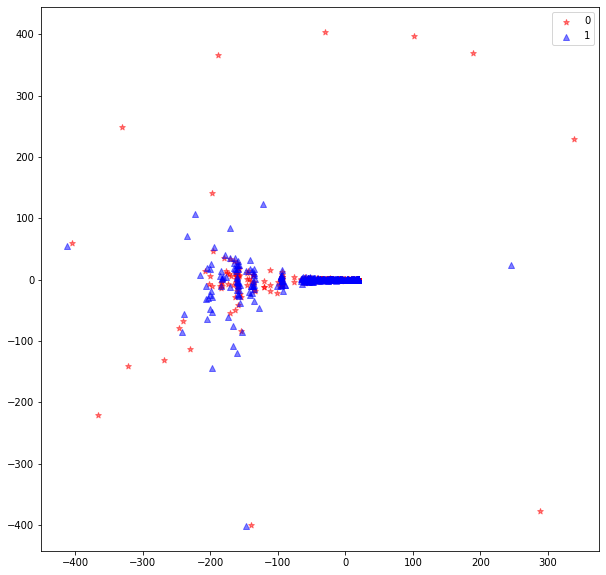

In [175]:
embedded_2_mds = mds.fit_transform(embs_resample.astype(np.float64)) # float64 fix array not symmetric issue
plot_embeddings(embedded_2_mds, labels_resample)

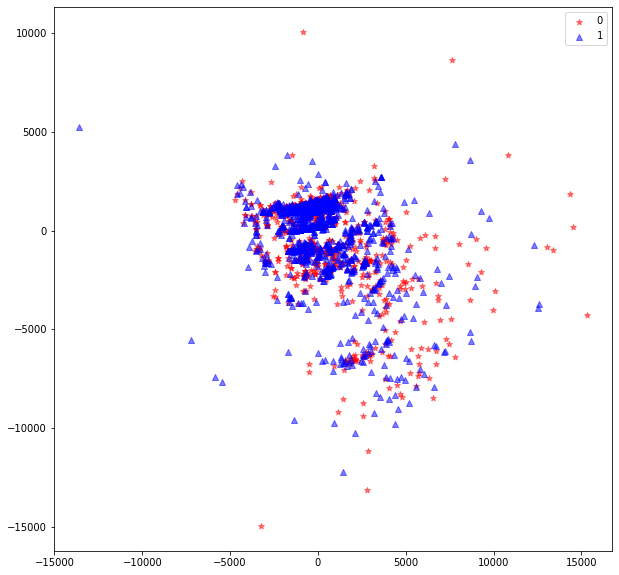

In [176]:
embedded_2_origin_mds = mds.fit_transform(orig_data)
plot_embeddings(embedded_2_origin_mds, labels_resample_orig)